<a href="https://colab.research.google.com/github/1dgog/TC3006C_portafolio_m2/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución a [titanic](https://www.kaggle.com/competitions/titanic/overview) con redes neuronales

## Conexión con Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/MyDrive
'Colab Notebooks'     gender_submission.csv   PlayDataset.csv	 test.csv
'Documentos utiles'   iris.data		      Portugues		 train.csv
 EBSCO		      iris.names	      real_estate.csv	 Valhalla23.csv
 EGSGLP		      LiFE		     'Servicio Social'	 wine.data
 Fotos		     'Plan de estudios'      'Sin ordenar'	 wine.names


Se importan las librerias para análisis de datos y visualización de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la base de datos

Se importan los datasets

In [ ]:
columns = ["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df_train = pd.read_csv('train.csv', names = columns)
df_train = df_train.iloc[1: , :]
df_train = df_train.drop(columns = "Cabin")
df_train = df_train.dropna()

## las columnas inecesarias se desechan, como cabin y embarked

dfInput = df_train[["PassengerId","Pclass","Age","SibSp","Parch","Fare"]]
dfOutput = df_train["Survived"]

## gender

columns = ["PassengerId","Survived"]
df_gender = pd.read_csv('gender_submission.csv',names = columns)
df_gender = df_gender.iloc[1: , :]

## test

columns = ["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df_test = pd.read_csv('test.csv',names = columns)
df_test = df_test.iloc[1: , :]
dftestInput = df_test[["PassengerId","Pclass","Age","SibSp","Parch","Fare"]]
dftestOutput = df_gender["Survived"]
dfagain = pd.concat([dftestInput,dftestOutput],axis=1)
dfagain = dfagain.dropna()
dftestInput = dfagain[["PassengerId","Pclass","Age","SibSp","Parch","Fare"]]
dftestOutput = dfagain["Survived"]


df_test.shape
df_gender.shape
dftestOutput.isnull().sum().sum()
x = {}
for ii in dfagain:
  x[ii] = dfagain[ii].isnull().sum().sum()
print(x) ## se encuentra que hay 87 nulls en age, por lo que se debe de hacer un drop que corresponda

dfagain

{'PassengerId': 0, 'Pclass': 0, 'Age': 0, 'SibSp': 0, 'Parch': 0, 'Fare': 0, 'Survived': 0}


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
1,892,3,34.5,0,0,7.8292,0
2,893,3,47,1,0,7,1
3,894,2,62,0,0,9.6875,0
4,895,3,27,0,0,8.6625,0
5,896,3,22,1,1,12.2875,1
...,...,...,...,...,...,...,...
410,1301,3,3,1,1,13.775,1
412,1303,1,37,1,0,90,1
413,1304,3,28,0,0,7.775,1
415,1306,1,39,0,0,108.9,1


¿Cuantos NaNs hay por columna?

{'PassengerId': 0, 'Pclass': 0, 'Age': 86, 'SibSp': 0, 'Parch': 0, 'Fare': 1}


De esto se interpreta que no es apropiado eliminar los renglones con NaNs en su totalidad, puesto que la columna Fare tiene 687 datos Null, y por ende el número total de datos bajaría de eliminar estos renglones. Por lo anterior, se aplica drop a la columna Fare, pues no presenta relevancia.

Se hace un scatter para observar la distribución de datos de 

([], <a list of 0 Text major ticklabel objects>)

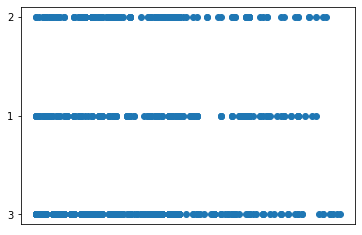

In [ ]:
plt.scatter(df_train["Age"],df_train["Pclass"])
plt.xticks(range(100, 5))

De este histograma se encuentra que se tiene un ligero sesgo hacia la derecha en las edades

(array([125., 102., 117.,  76., 132.,  31.,  43.,  44.,  29.,  13.]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <a list of 10 Patch objects>)

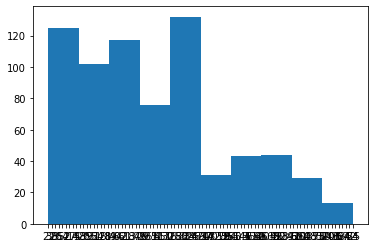

In [ ]:
plt.hist(df_train["Age"])

Se observa que la tercera clase es la que más datos tiene

(array([355.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 173.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

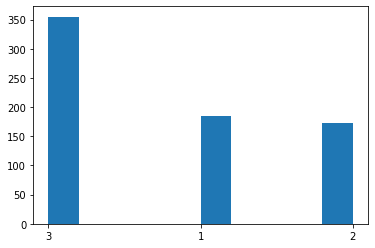

In [ ]:
plt.hist(df_train["Pclass"])

Hubieron más fallecidos que sobrevivientes.

(array([424.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 288.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

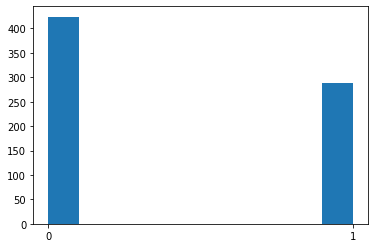

In [ ]:
plt.hist(df_train["Survived"])

Se explora sobrevivientes en grupo o solos

# Machine learning con librerias

Dado que estados resultantes de las predicciones son solo vivo y muerto, se considera que un clasificador binario como regresión logistica podría ser útil.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
dftestInput.shape
dftestOutput.shape

(418,)

In [ ]:
nnSurv = MLPClassifier(hidden_layer_sizes=(10,10), 
                     activation='logistic', verbose=False, solver='adam',
                     learning_rate='adaptive', max_iter=2000)
nnSurv.fit(dfInput,dfOutput)
print('Training score: ', nnSurv.score(dfInput, dfOutput))
print('Testing score: ', nnSurv.score(dftestInput, dftestOutput)) ## error en tamaño de 418 contra 87
print(nnSurv)
print(nnSurv.coefs_)

Training score:  0.7401685393258427
Testing score:  0.6435045317220544
MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10),
              learning_rate='adaptive', max_iter=2000)
[array([[-0.25486439, -0.25972323,  0.29482764, -0.09611564,  0.27190171,
         0.00243024, -0.00737552,  0.00229456,  0.15931393, -0.00493531],
       [-0.05595253,  0.12792126,  0.11933086,  0.51305105, -0.83490156,
        -0.21798132,  0.96127835,  0.27792435,  0.43489166, -0.07719037],
       [-0.70842706, -0.8383507 ,  0.07470519,  0.38944543, -0.34171083,
        -0.26143749,  0.33792649,  0.0052251 ,  0.16202313, -0.15384366],
       [ 0.86314459,  0.56209967, -0.55100129,  0.81283072,  0.0098089 ,
        -1.37553942, -0.19668454,  1.72117781, -0.81850585, -0.02448052],
       [ 0.09683793,  0.02327493,  0.3312279 ,  0.61300823, -0.29313146,
         0.23538697, -0.37478365,  0.2522833 ,  0.72996292,  1.14589982],
       [ 0.09510214,  0.11208873,  0.16645963,  0.06307506,  0.02595262,